In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)
Reshaped Training Set (73257, 32, 32, 3) (73257, 1)
Reshaped Test Set (26032, 32, 32, 3) (26032, 1)
Training Set (58605, 32, 32, 3) (58605, 10)
Validation Set (14652, 32, 32, 3) (14652, 10)
Test Set (26032, 32, 32, 3) (26032, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 96s 103ms/step - accuracy: 0.3961 - loss: 1.7415 - val_accuracy: 0.8308 - val_loss: 0.5714
Epoch 2/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 143s 104ms/step - accuracy: 0.8108 - loss: 0.6466 - val_accuracy: 0.8675 - val_loss: 0.4500
Epoch 3/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 142s 104ms/step - accuracy: 0.8502 - loss: 0.5038 - val_accuracy: 0.8824 - val_loss: 0.3980
Epoch 4/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 95s 103ms/step - accuracy: 0.8681 - loss: 0.4482 - val_accuracy: 0.8892 - val_loss: 0.3765
Epoch 5/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 100s 109ms/step - accuracy: 0.8778 - loss: 0.4113 - val_accuracy: 0.8976 - val_loss: 0.3486
Epoch 6/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 101s 110ms/step - accuracy: 0.8916 - loss: 0.3741 - val_accuracy: 0.8968 - val_loss: 0.3459
Epoch 7/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 136s 104ms/step - accuracy: 0.8949 - loss: 0.3551 - val_accuracy: 0.9043 - val_loss: 0.3303
Epoch 8/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 95s 104ms/step - accuracy: 0.9033 - lo

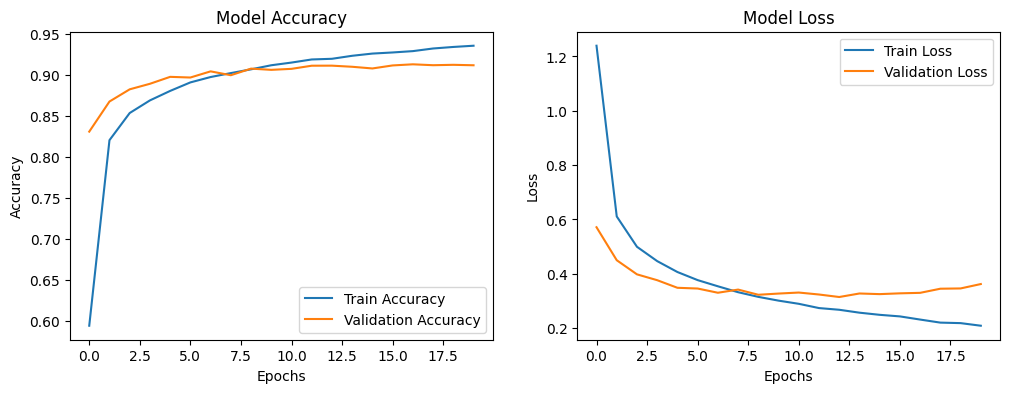

In [ ]:
# Install necessary libraries
!pip install mat73

import mat73
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define dataset paths
train_dataset_path = '/content/drive/MyDrive/train_32x32.mat'
test_dataset_path = '/content/drive/MyDrive/test_32x32.mat'

# Load data function
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)  # Since the original dataset isn't using mat73 but loadmat
    return data['X'], data['y']

# Load training and test data
X_train, y_train = load_data(train_dataset_path)
X_test, y_test = load_data(test_dataset_path)

# Inspect the shape
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

# Transpose the dataset: (width, height, channels, samples) -> (samples, width, height, channels)
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))

print("Reshaped Training Set", X_train.shape, y_train.shape)
print("Reshaped Test Set", X_test.shape, y_test.shape)

# Normalize the image data (from 0-255 to 0-1)
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/ 255.0

# Handle label 10 (which represents '0') as 0 for classification
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training Set", X_train.shape, y_train.shape)
print("Validation Set", X_val.shape, y_val.shape)
print("Test Set", X_test.shape, y_test.shape)

### Building the CNN Model
def build_model():
    model = Sequential()

    # First convolution layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolution layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolution layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (10 digits, softmax activation for classification)
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build the model
model = build_model()

# Print model summary
model.summary()

### Training the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

### Evaluating the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

### Plotting Training History
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step


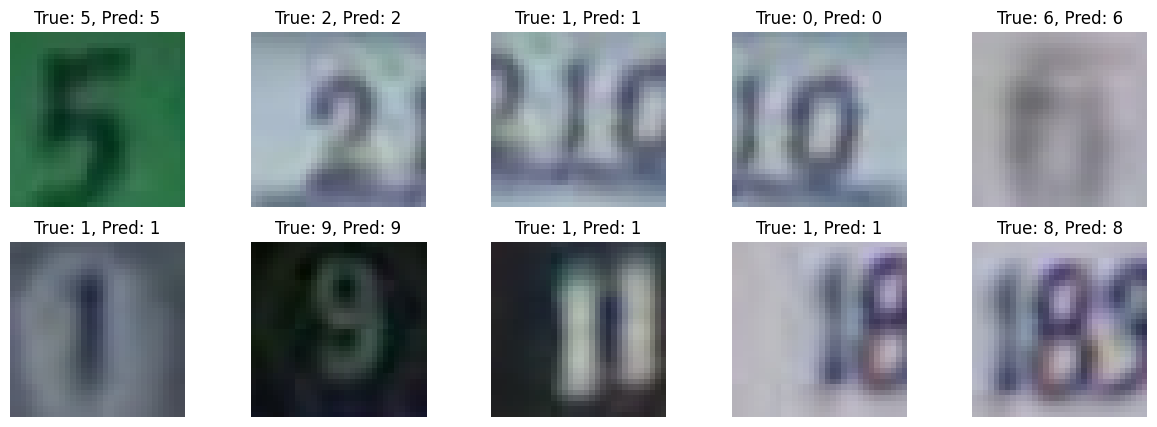

In [ ]:
# prompt: wrtie code to show pridected picturs and true images

# Get predictions for the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Function to display a few predicted images with their true labels
def display_predictions(num_images=10):
  """Displays predicted images with their true and predicted labels."""
  plt.figure(figsize=(15, 5))
  for i in range(num_images):
      plt.subplot(2, num_images // 2, i + 1)
      plt.imshow(X_test[i])
      plt.title(f"True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}")
      plt.axis('off')
  plt.show()


# Display a few predictions
display_predictions(10)


In [ ]:
# prompt: now save this  model and make user interface function so that the usser input picture and cheak how models is working

# Save the model
model.save('svhn_cnn_model.h5')

from google.colab import files
files.download('svhn_cnn_model.h5')


# UI function for user input and prediction
def predict_from_user_input():
    from google.colab import files
    uploaded = files.upload()

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

        # Process the uploaded image (you might need to adjust this based on the image format)
        from PIL import Image
        import io
        image = Image.open(io.BytesIO(uploaded[fn])).convert('RGB')
        image = image.resize((32, 32))
        image_array = np.array(image) / 255.0  # Normalize
        image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

        # Make prediction
        prediction = model.predict(image_array)
        predicted_class = np.argmax(prediction)

        print(f"Predicted digit: {predicted_class}")

# Call the UI function to enable user input and prediction
predict_from_user_input()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('svhn_cnn_model.h5')